In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.preprocessing 

%matplotlib inline

In [59]:
data = pd.read_csv('Cars93.csv')
#data

In [8]:
print(data.keys()) # Imprime los headers

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')


In [10]:
Y = np.array(data['Price'])
columns = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 
          'Fuel.tank.capacity', 'Length', 'Width', 'Turn.circle', 'Weight']
X = np.array(data[columns])
print(np.shape(Y), np.shape(X))

(93,) (93, 11)


[-0.09749227  0.01704899  1.39323074  0.14090089 -0.00192575  0.00278482
  0.15973715  0.17275455 -1.48506513 -0.4955841   0.00570524]
0.7203097553950033


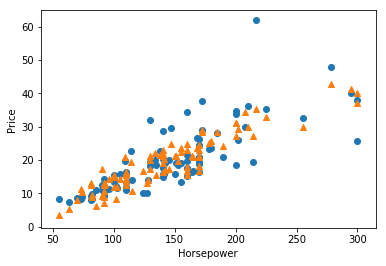

In [11]:
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X, Y)
plt.scatter(X[:,3], Y)
plt.scatter(X[:,3], regresion.predict(X), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(regresion.coef_)
print(regresion.score(X, Y))

In [23]:
ii = np.argsort(np.abs(regresion.coef_))
for i in ii:
    print(columns[i], regresion.coef_[i])

RPM -0.0019257504559045719
Rev.per.mile 0.002784817746333731
Weight 0.0057052411740398075
MPG.highway 0.017048990851948914
MPG.city -0.09749226980236592
Horsepower 0.14090088973596313
Fuel.tank.capacity 0.15973714632713032
Length 0.17275455070393753
Turn.circle -0.4955841047125254
EngineSize 1.3932307353329387
Width -1.4850651343939498


In [26]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(93, 11)

[-0.54493458  0.09041051  1.43749468  7.3398184  -1.14296137  1.37522633
  0.52101334  2.50902869 -5.58178722 -1.5887873   3.34735886]
0.7203097553950034


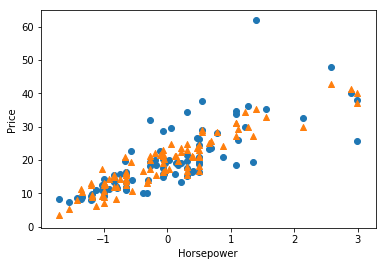

In [27]:
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X_scaled, Y)
plt.scatter(X_scaled[:,3], Y)
plt.scatter(X_scaled[:,3], regresion.predict(X_scaled), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(regresion.coef_)
print(regresion.score(X_scaled, Y))

In [44]:
ii = np.argsort(np.abs(regresion.coef_))
for i in ii:
    print(columns[i], regresion.coef_[i])

MPG.highway 0.0904105148606309
Fuel.tank.capacity 0.5210133395919336
MPG.city -0.5449345836364952
RPM -1.1429613658645215
Rev.per.mile 1.3752263266684068
EngineSize 1.4374946765397847
Turn.circle -1.5887872965325718
Length 2.5090286903257812
Weight 3.3473588588940046
Width -5.581787223830638
Horsepower 7.339818399275949


[-0.         -0.36030952  0.          6.2774144   0.          0.
  0.05270653  0.34022431 -0.45301057 -0.13254975  0.9659147 ]
0.6419177402686429
MPG.city -0.0
EngineSize 0.0
RPM 0.0
Rev.per.mile 0.0
Fuel.tank.capacity 0.052706534653787634
Turn.circle -0.13254974891711788
Length 0.3402243137262088
MPG.highway -0.36030952142395767
Width -0.45301056977418214
Weight 0.9659147010131003
Horsepower 6.2774144013523685


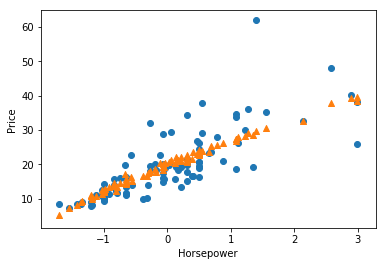

In [51]:
lasso = sklearn.linear_model.Lasso(alpha=0.5)
lasso.fit(X_scaled, Y)
plt.scatter(X_scaled[:,3], Y)
plt.scatter(X_scaled[:,3], lasso.predict(X_scaled), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(lasso.coef_)
print(lasso.score(X_scaled, Y))
ii = np.argsort(np.abs(lasso.coef_))
for i in ii:
    print(columns[i], lasso.coef_[i])

[-0.59012223  0.03751174  1.58263259  7.08196628 -0.95150151  1.36424887
  0.53396755  2.40426318 -5.28659181 -1.5758572   3.19544908]
0.7200720923800084
MPG.highway 0.03751173805835117
Fuel.tank.capacity 0.5339675534774521
MPG.city -0.5901222293606917
RPM -0.9515015109623176
Rev.per.mile 1.3642488659341412
Turn.circle -1.5758572028914308
EngineSize 1.5826325945135857
Length 2.404263183763284
Weight 3.1954490765775287
Width -5.286591809265654
Horsepower 7.0819662813837105


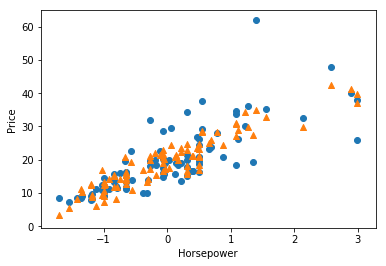

In [58]:
ridge = sklearn.linear_model.Ridge(alpha=0.5)
ridge.fit(X_scaled, Y)
plt.scatter(X_scaled[:,3], Y)
plt.scatter(X_scaled[:,3], ridge.predict(X_scaled), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(ridge.coef_)
print(ridge.score(X_scaled, Y))
ii = np.argsort(np.abs(ridge.coef_))
for i in ii:
    print(columns[i], ridge.coef_[i])